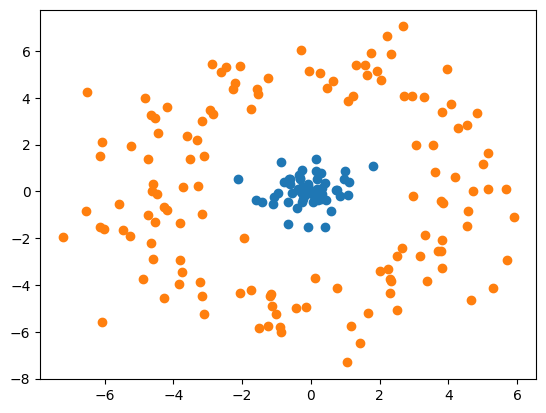

In [6]:
import tools as tl
import matplotlib.pyplot as plt

X, y = tl.gen_simple_circular_distribution(n=200)
plt.scatter(X[y == 0,0],X[y==0,1])
plt.scatter(X[y == 1,0],X[y==1,1])


In [7]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
import numpy as np

Xgrid, x1line,x2line  = tl.gen_sample_grid(limit =10)

In [8]:
# set up the sequential neural network
model = Sequential()

# add the layers
model.add(Dense(units=4, activation = 'relu', input_dim=2))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='sgd')

y_binary = to_categorical(y)

model.fit(X,y_binary, epochs=250,batch_size=32)

Epoch 1/250
7/7 [==============================] - 0s 3ms/step - loss: 0.6344
Epoch 2/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5797
Epoch 3/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5412
Epoch 4/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5144
Epoch 5/250
7/7 [==============================] - 0s 1ms/step - loss: 0.4959
Epoch 6/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4819
Epoch 7/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4701
Epoch 8/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4599
Epoch 9/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4520
Epoch 10/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4454
Epoch 11/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4392
Epoch 12/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4341
Epoch 13/250
7/7 [==============================] - 0s 0s/ste

1250/1250 [==============================] - 2s 1ms/step
(200, 200)
[[4.1744252e-10 4.6125401e-10 5.0966070e-10 ... 4.2950407e-10
  3.9103359e-10 3.5601028e-10]
 [4.8744997e-10 5.3860788e-10 5.9513250e-10 ... 5.0294058e-10
  4.5789414e-10 4.1688236e-10]
 [5.6919697e-10 6.2893418e-10 6.9493949e-10 ... 5.8893207e-10
  5.3618376e-10 4.8815896e-10]
 ...
 [1.9863412e-08 2.2376737e-08 2.5207980e-08 ... 2.1071919e-10
  1.9038490e-10 1.7201188e-10]
 [1.7994521e-08 2.0271376e-08 2.2836279e-08 ... 1.7906579e-10
  1.6178543e-10 1.4617267e-10]
 [1.6301501e-08 1.8364137e-08 2.0687759e-08 ... 1.5216609e-10
  1.3748187e-10 1.2421518e-10]]


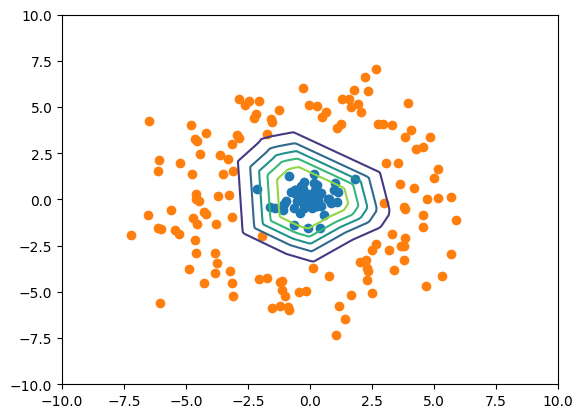

In [11]:
# predicted the model onto a Xgrid
predicted_grid = model.predict(Xgrid)

# why is there two outputs in predicted grid I do not understand
predicted_grid = np.reshape(predicted_grid[:,0], [200,200])
print(np.shape(predicted_grid))

plt.contour(x1line,x2line,predicted_grid)
plt.scatter(X[y == 0,0],X[y==0,1])
plt.scatter(X[y == 1,0],X[y==1,1])


In [10]:
# save the model
model.save('Circular data set.h5')